<a href="https://colab.research.google.com/github/gautam200/demo/blob/main/KNN_for_Heart_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd                                       #data manipulation
import numpy as np                                        #data manipulation
import sklearn                                            #ML support
from sklearn.neighbors import KNeighborsClassifier as knn #KNN Classifier


In [ ]:
df = pd.read_csv("heart.csv")                             #Loading the data into data frame
df

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.isnull().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp             0
cholestoral            0
fasting_blood_sugar    0
restecg                0
max_hr                 0
exang                  0
oldpeak                0
slope                  0
num_major_vessels      0
thal                   0
target                 0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df[['age']].values.astype(float))
df['age_normalized_data']=x_scaled
df[['age','age_normalized_data']]

,age,age_normalized_data
0,63,0.708333
1,37,0.166667
2,41,0.250000
3,56,0.562500
4,57,0.583333
...,...,...
298,57,0.583333
299,45,0.333333
300,68,0.812500
301,57,0.583333


In [ ]:
Y = df[['age_normalized_data']]
X = df.drop(columns=['age'])

In [ ]:
X

,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target,age_normalized_data
0,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0.708333
1,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0.166667
2,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0.250000
3,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0.562500
4,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0.583333
299,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0.333333
300,1,0,144,193,1,1,141,0,3.4,1,2,3,0,0.812500
301,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0.583333


In [ ]:
Y

,age_normalized_data
0,0.708333
1,0.166667
2,0.250000
3,0.562500
4,0.583333
...,...
298,0.583333
299,0.333333
300,0.812500
301,0.583333


In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df[['cholestoral']].values.astype(float))
df['cholestoral_norm_data']=x_scaled
df[['cholestoral','cholestoral_norm_data']]

,cholestoral,cholestoral_norm_data
0,233,0.244292
1,250,0.283105
2,204,0.178082
3,236,0.251142
4,354,0.520548
...,...,...
298,241,0.262557
299,264,0.315068
300,193,0.152968
301,131,0.011416


In [ ]:
Y = df[['cholestoral_norm_data']]
X = df.drop(columns=['cholestoral'])

In [ ]:
X

,age,sex,chest_pain_type,resting_bp,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target,age_normalized_data,cholestoral_norm_data
0,63,1,3,145,1,0,150,0,2.3,0,0,1,1,0.708333,0.244292
1,37,1,2,130,0,1,187,0,3.5,0,0,2,1,0.166667,0.283105
2,41,0,1,130,0,0,172,0,1.4,2,0,2,1,0.250000,0.178082
3,56,1,1,120,0,1,178,0,0.8,2,0,2,1,0.562500,0.251142
4,57,0,0,120,0,1,163,1,0.6,2,0,2,1,0.583333,0.520548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,0,1,123,1,0.2,1,0,3,0,0.583333,0.262557
299,45,1,3,110,0,1,132,0,1.2,1,0,3,0,0.333333,0.315068
300,68,1,0,144,1,1,141,0,3.4,1,2,3,0,0.812500,0.152968
301,57,1,0,130,0,1,115,1,1.2,1,1,3,0,0.583333,0.011416


In [ ]:
Y

,cholestoral_norm_data
0,0.244292
1,0.283105
2,0.178082
3,0.251142
4,0.520548
...,...
298,0.262557
299,0.315068
300,0.152968
301,0.011416


In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df[['resting_bp']].values.astype(float))
df['resting_bp_norm_data']=x_scaled
df[['resting_bp','resting_bp_norm_data']]

,resting_bp,resting_bp_norm_data
0,145,0.481132
1,130,0.339623
2,130,0.339623
3,120,0.245283
4,120,0.245283
...,...,...
298,140,0.433962
299,110,0.150943
300,144,0.471698
301,130,0.339623


In [ ]:
Y = df[['resting_bp_norm_data']]
X = df.drop(columns=['resting_bp'])

In [ ]:
X

,age,sex,chest_pain_type,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target,age_normalized_data,cholestoral_norm_data,resting_bp_norm_data
0,63,1,3,233,1,0,150,0,2.3,0,0,1,1,0.708333,0.244292,0.481132
1,37,1,2,250,0,1,187,0,3.5,0,0,2,1,0.166667,0.283105,0.339623
2,41,0,1,204,0,0,172,0,1.4,2,0,2,1,0.250000,0.178082,0.339623
3,56,1,1,236,0,1,178,0,0.8,2,0,2,1,0.562500,0.251142,0.245283
4,57,0,0,354,0,1,163,1,0.6,2,0,2,1,0.583333,0.520548,0.245283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,241,0,1,123,1,0.2,1,0,3,0,0.583333,0.262557,0.433962
299,45,1,3,264,0,1,132,0,1.2,1,0,3,0,0.333333,0.315068,0.150943
300,68,1,0,193,1,1,141,0,3.4,1,2,3,0,0.812500,0.152968,0.471698
301,57,1,0,131,0,1,115,1,1.2,1,1,3,0,0.583333,0.011416,0.339623


In [ ]:
Y

,resting_bp_norm_data
0,0.481132
1,0.339623
2,0.339623
3,0.245283
4,0.245283
...,...
298,0.433962
299,0.150943
300,0.471698
301,0.339623


In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df[['max_hr']].values.astype(float))
df['max_hr_norm_data']=x_scaled
df[['max_hr','max_hr_norm_data']]

,max_hr,max_hr_norm_data
0,150,0.603053
1,187,0.885496
2,172,0.770992
3,178,0.816794
4,163,0.702290
...,...,...
298,123,0.396947
299,132,0.465649
300,141,0.534351
301,115,0.335878


In [ ]:
Y = df[['max_hr_norm_data']]
X = df.drop(columns=['max_hr'])

In [ ]:
Y

,max_hr_norm_data
0,0.603053
1,0.885496
2,0.770992
3,0.816794
4,0.702290
...,...
298,0.396947
299,0.465649
300,0.534351
301,0.335878


In [ ]:
X

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,exang,oldpeak,slope,num_major_vessels,thal,target,age_normalized_data,cholestoral_norm_data,resting_bp_norm_data,max_hr_norm_data
0,63,1,3,145,233,1,0,0,2.3,0,0,1,1,0.708333,0.244292,0.481132,0.603053
1,37,1,2,130,250,0,1,0,3.5,0,0,2,1,0.166667,0.283105,0.339623,0.885496
2,41,0,1,130,204,0,0,0,1.4,2,0,2,1,0.250000,0.178082,0.339623,0.770992
3,56,1,1,120,236,0,1,0,0.8,2,0,2,1,0.562500,0.251142,0.245283,0.816794
4,57,0,0,120,354,0,1,1,0.6,2,0,2,1,0.583333,0.520548,0.245283,0.702290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,1,0.2,1,0,3,0,0.583333,0.262557,0.433962,0.396947
299,45,1,3,110,264,0,1,0,1.2,1,0,3,0,0.333333,0.315068,0.150943,0.465649
300,68,1,0,144,193,1,1,0,3.4,1,2,3,0,0.812500,0.152968,0.471698,0.534351
301,57,1,0,130,131,0,1,1,1.2,1,1,3,0,0.583333,0.011416,0.339623,0.335878


**Train Test Split**

In [ ]:
# Split the dataset into features (X) and the target variable (y)
X = df.drop('target', axis=1)  # Assuming 'target' is the column you want to predict
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape     #Print the shapes

(212, 17)

In [ ]:
X_test.shape

(91, 17)

In [ ]:
y_train.shape

(212,)

In [ ]:
y_test.shape

(91,)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(212, 91, 212, 91)

**Average Accuracy**

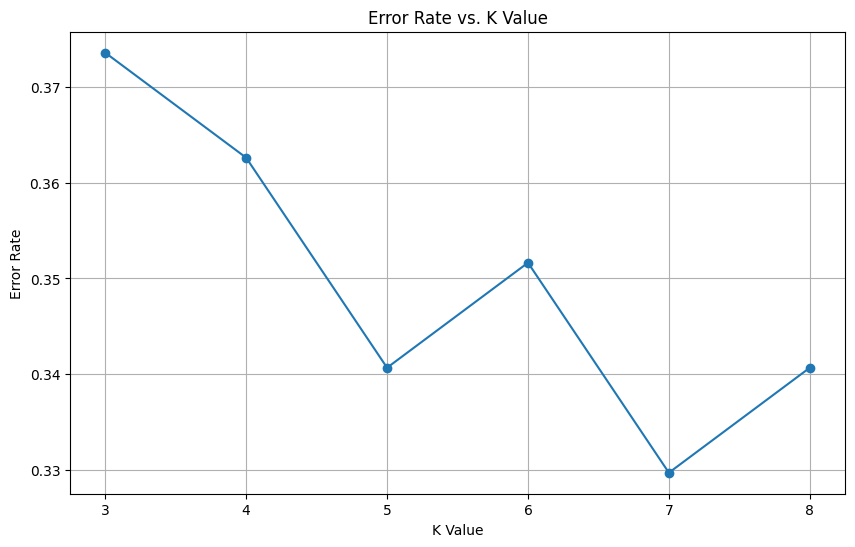

K=3: Accuracy = 0.6264
K=4: Accuracy = 0.6374
K=5: Accuracy = 0.6593
K=6: Accuracy = 0.6484
K=7: Accuracy = 0.6703
K=8: Accuracy = 0.6593


In [ ]:
# Initialize variables to store K values and corresponding accuracies
k_values = [3, 4, 5, 6, 7, 8]
accuracies = []

# Iterate through different values of K
for k in k_values:
    # Create a K-NN classifier with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model on the training data
    knn.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = knn.predict(X_test)

    # Calculate accuracy and append it to the list
    accuracy = np.mean(y_pred == y_test)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, [1 - accuracy for accuracy in accuracies], marker='o', linestyle='-')
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Display the accuracies for each K value
for k, accuracy in zip(k_values, accuracies):
    print(f'K={k}: Accuracy = {accuracy:.4f}')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create an instance of DecisionTreeClassifier
regressor = DecisionTreeClassifier()

# Fit the classifier to the training data
regressor.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = regressor,X=X_train,y=y_train,cv=15)


In [ ]:
accuracies

array([0.86666667, 0.73333333, 0.57142857, 0.64285714, 0.71428571,
       0.85714286, 0.57142857, 0.78571429, 0.78571429, 0.64285714,
       0.78571429, 0.78571429, 0.78571429, 0.78571429, 0.57142857])

**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)                              # Positive   Negative
                                                                   # Positive   TP         FN
                                                                   # Negative   FP         TN

In [ ]:
conf_matrix

array([[27, 14],
       [17, 33]])

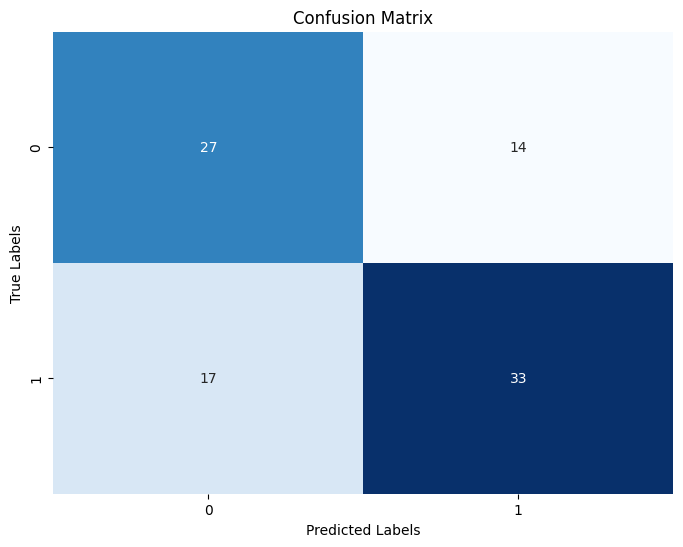

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**Checking class Imbalance**

In [ ]:
counts = df['target'].value_counts()
print(counts)


1    165
0    138
Name: target, dtype: int64


In [ ]:
minority_class_count = counts.min()
majority_class_count = counts.max()
imbalance_ratio = majority_class_count / minority_class_count                       #We can use SMOTE

print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

Imbalance Ratio: 1.20
